<a href="https://colab.research.google.com/github/AashiDutt/Vision-Transformers/blob/main/Vision_Transformer_with_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 25.7 MB/s 
     |████████████████████████████████| 163 kB 56.0 MB/s 
     |████████████████████████████████| 7.6 MB 51.5 MB/s 


In [8]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

url = 'https://cdn.pixabay.com/photo/2016/02/19/15/46/labrador-retriever-1210559__480.jpg'
image = Image.open(requests.get(url, stream = True).raw)

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')  #divides image into patch size of 16 X 16 and resize to 224
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = feature_extractor(images = image, return_tensors = 'pt')
outputs = model(**inputs)
logits = outputs.logits



In [9]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class: ", model.config.id2label[predicted_class_idx])

Predicted class:  Labrador retriever


(-0.5, 639.5, 479.5, -0.5)

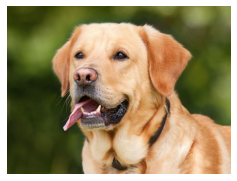

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (4,4))
plt.imshow(image)
plt.axis("off")